# ASSIGNMENT  REGRESSION : Bike Sharing System

Bike sharing systems are a means of renting bicycles where the process of
obtaining membership, rental, and bike return is automated via a network of
kiosk locations throughout a city. Using these systems, people are able to
rent a bike from one location and return it to a different place on an
as-needed basis. Currently, there are over 500 bike-sharing programs
around the world.
The data generated by these systems makes them attractive for
researchers because the duration of travel, departure location, arrival
location, and time elapsed is explicitly recorded. Bike sharing systems
therefore function as a sensor network, which can be used for studying
mobility in a city.

Problem Statement:
To combine historical usage patterns with
weather data in order to forecast hourly bike rental demand.

In [1]:
import pandas as pd

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
train=pd.read_csv('train1.csv')

In [4]:
test=pd.read_csv('test1.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [6]:
train.shape

(12980, 12)

In [7]:
test.shape

(4399, 11)

In [8]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

here in test data set the count column is missing so we can assume that count is the target variable

In [10]:

train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

all the data types in the dataset are numerical except the datetime variable.


In [11]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

There are no missing values in the train and the test dataset.

Now lets look at the distribution of the target variable.


# UNIVARIATE ANALYSIS

<AxesSubplot:ylabel='Frequency'>

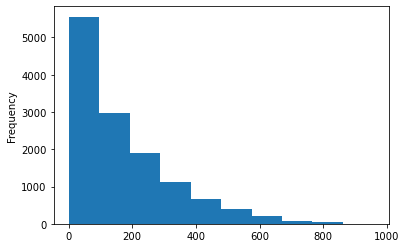

In [14]:
train['count'].plot.hist()


Here the distribution is skewed towards the right so lets take the log of variable to see if we get normal distribution

<AxesSubplot:ylabel='Frequency'>

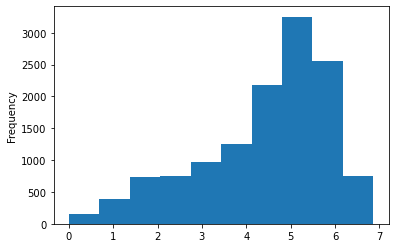

In [15]:
np.log(train['count']).plot.hist()

here the distribution is less skewed , now we will explore all other variables individually to have a better understanding of the data.
   

<AxesSubplot:ylabel='Frequency'>

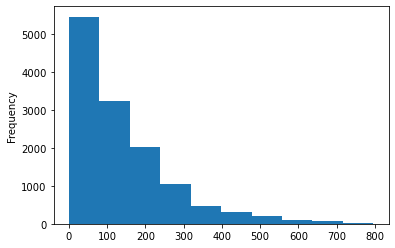

In [16]:
train['registered'].plot.hist()

We can observe that the most of the registered rentals lie between 0-200.

<AxesSubplot:ylabel='Frequency'>

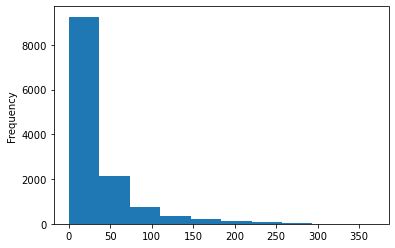

In [17]:
train['casual'].plot.hist()

Here we can observe that most of the  casual rentals lie between 0-50.
Now lets look at the corelation of the numerical values.

# Bivariate Analysis

In [18]:
corr=train[['temp','atemp','humidity','windspeed','registered','casual','count']].corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'temp'),
  Text(0, 1.5, 'atemp'),
  Text(0, 2.5, 'humidity'),
  Text(0, 3.5, 'windspeed'),
  Text(0, 4.5, 'registered'),
  Text(0, 5.5, 'casual'),
  Text(0, 6.5, 'count')])

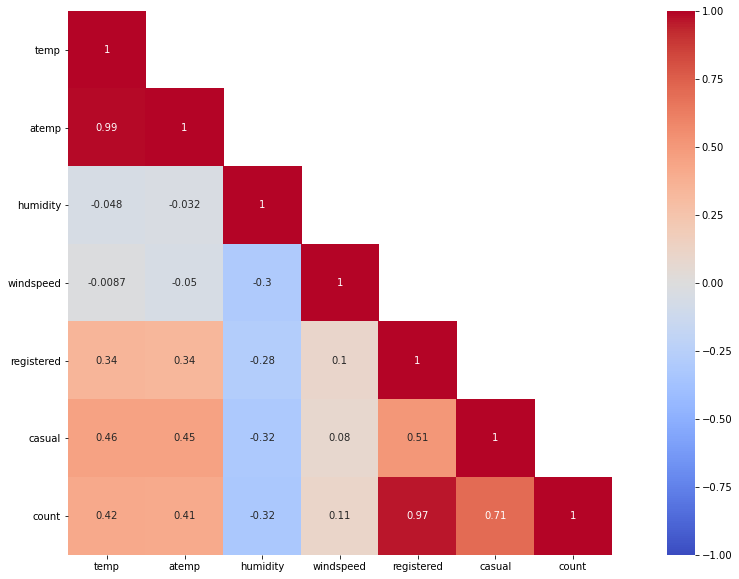

In [19]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr,square=True,mask=mask,vmin = -1, vmax = 1, center = 0,annot=True,cmap="coolwarm")
plt.yticks(rotation=0)

From the above correlation map we can observe the following:

1. temp and atemp have a positive correlation with count but they also have a strong correlation between them so we have to drop one of the variable during the model building since they will exhibit multicollinearity in the data.

2. humidity has a negative correlation with the count variable , although it is not very prominent still the count variable has got little dependency on it.

3. windspeed will not be a useful numerical feature , it is visible from its correlation value with count.

In [20]:
from datetime import datetime
from datetime import date
import calendar

In [21]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [22]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Now the data is ready.
Now we will divide the train set into training and validation set.
We will train the  model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time.

In [23]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

we have taken first 15 months for training and 3 months for validation.

We will drop the datetime, date variable as we have already extracted features from these variables.
We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [24]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# Model Building

# LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lreg=LinearRegression()

Now we will remove the target variable from the test data and validation data and store it seperately.
We saw in data visualization that the data is right skewed so we will take the log before fitting it in the model.

In [27]:
x_train=training.drop('count',1)
y_train=np.log(training['count'])
x_val=validation.drop('count',1)
y_val=np.log(validation['count'])

In [28]:
lreg.fit(x_train,y_train)

LinearRegression()

now we have trained our model so now we will predict the x_val and check the performance of the model.

In [29]:
prediction=lreg.predict(x_val)

now we will check the score using evaluation metrics RMSLE.


In [30]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_val,prediction))

0.18379342570222973

We have got the score of the RMSLE , now we will make predictions on the test data set.

In [31]:
lreg_testprediction=lreg.predict(test)

Now we will Decision tree to predict the values and see if we can reduce the RMSLE value.

# DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtreg=DecisionTreeRegressor(max_depth=5)

In [34]:
dtreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [35]:
dtpredict=dtreg.predict(x_val)

In [36]:
np.sqrt(mean_squared_log_error(y_val,dtpredict))

0.037678868976303626

Here the rmsle value has decreased to 0.03767. So we will predict the count variable in the test data set

In [37]:
dt_testprediction=dtreg.predict(test)

In [38]:
final_prediction=np.exp(dt_testprediction)

Here we have converted our data into original form since we converted into logarithmic form.

In [39]:
submission=pd.DataFrame()

In [40]:
submission['count']=final_prediction

In [41]:
submission.to_csv('submission.csv',header=True,index=False)